# Program for Target Salary (Numerical Variable ). 

# Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

# Reading the data file 

In [2]:
raw_data = pd.read_csv("DATASETS/Salarysatisfaction.csv",encoding=('ISO-8859-1'),low_memory=False)

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945
Data columns (total 83 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          2946 non-null   int64  
 1   Target_Salary               2946 non-null   float64
 2   Target_Satisfied            2946 non-null   int64  
 3   LOAN_AMT                    2946 non-null   object 
 4   Business Title              2946 non-null   object 
 5   Civil Service Title         2946 non-null   object 
 6   Division/Work Unit          2946 non-null   object 
 7   Job Description             2946 non-null   object 
 8   Minimum Qual Requirements   2926 non-null   object 
 9   Preferred Skills            2553 non-null   object 
 10  Additional Information      1854 non-null   object 
 11  To Apply                    2945 non-null   object 
 12  Hours/Shift                 884 non-null    object 
 13  Residency Requirement       2942 

# Assigning one common name as “Other” to all the less frequent Business Tittles (frequency less than 1)

In [4]:
raw_data['Business Title'].value_counts()

Assistant Civil Engineer        33
Project Manager                 29
College Aide                    24
Construction Project Manager    22
ACCOUNTABLE MANAGER             20
                                ..
Applications Worker              1
Revenue Support Specialist       1
Civilian Investigator            1
Agency Attorney, Level III       1
Union Services Associate         1
Name: Business Title, Length: 1244, dtype: int64

In [5]:
bussines_title_stats = raw_data.groupby('Business Title')['Business Title'].agg('count').sort_values(ascending=False)

In [6]:
bussines_title_stats_less_than_one = bussines_title_stats[bussines_title_stats<=1]

In [7]:
raw_data['Business Title'] = raw_data['Business Title'].apply(lambda x:'Other' if x in bussines_title_stats_less_than_one else x)

In [8]:
raw_data['Business Title'].value_counts()

Other                                                    263
Assistant Civil Engineer                                  33
Project Manager                                           29
College Aide                                              24
Construction Project Manager                              22
                                                        ... 
Assistant Corporation Counsel, Brooklyn Tort Division      2
ASSISTANT ELECTRICAL INSPECTOR                             2
Financial Auditor                                          2
ASSISTANT ELECTRICAL ENGINEER                              2
Director of Facilities Maintenance                         2
Name: Business Title, Length: 982, dtype: int64

# Assigning one common name as “Other” to all the less frequent Civil Service Tittles (frequency less than 3)

In [9]:
raw_data['Civil Service Title'].value_counts()

COMMUNITY COORDINATOR             182
AGENCY ATTORNEY                   112
CIVIL ENGINEER                     87
CITY RESEARCH SCIENTIST            83
CONSTRUCTION PROJECT MANAGER       72
                                 ... 
MEMBER OF THE ENVIRONMENTAL CO      1
WORKER'S COMPENSATION BENEFITS      1
COMPUTER SERVICE TECHNICIAN (C      1
MARINE ENGINEER (WITH LICENSE)      1
ADM HOUSING DEV SPEC(NON MGRL)      1
Name: Civil Service Title, Length: 312, dtype: int64

In [10]:
title_stats = raw_data.groupby('Civil Service Title')['Civil Service Title'].agg('count').sort_values(ascending=False)

In [11]:
title_less_than_three=title_stats[title_stats<=3]

In [12]:
raw_data['Civil Service Title'] = raw_data['Civil Service Title'].apply(lambda x:'Other' if x in title_less_than_three else x)

In [13]:
raw_data['Civil Service Title'].value_counts()

Other                             300
COMMUNITY COORDINATOR             182
AGENCY ATTORNEY                   112
CIVIL ENGINEER                     87
CITY RESEARCH SCIENTIST            83
                                 ... 
CUSTODIAN                           4
TRAFFIC DEVICE MAINTAINER           4
YOUTH COORDINATOR (YOUTH SERVI      4
ELECTRICAL ENGINEERING INTERN       4
WATER USE INSPECTOR                 4
Name: Civil Service Title, Length: 159, dtype: int64

# Assigning one common name as “Other” to all the less frequent Divisions/Work Units (frequency less than 1)

In [14]:
raw_data['Division/Work Unit'].value_counts()

Executive Management              56
Central Brookly City Operation    36
Law Department                    32
Administration                    31
Citywide Cybersecurity            29
                                  ..
Risk Mitigation Divison/Civ        1
Vital Statistics/Vital Recor       1
Project Development - IFA          1
Conversions Unit                   1
DCLM/Civ and Cadet                 1
Name: Division/Work Unit, Length: 678, dtype: int64

In [15]:
division_stats = raw_data.groupby('Division/Work Unit')['Division/Work Unit'].agg('count').sort_values(ascending=False)

In [16]:
division_stats_less_than_one = division_stats[division_stats<=1]

In [17]:
raw_data['Division/Work Unit'] = raw_data['Division/Work Unit'].apply(lambda x:'Other' if x in division_stats_less_than_one else x)

In [18]:
raw_data['Division/Work Unit'].value_counts()

Other                             118
Executive Management               56
Central Brookly City Operation     36
Law Department                     32
Administration                     31
                                 ... 
Dep Comm Pub Info/Civ and Cad       2
HR Central                          2
QA Compliance & Training Dept       2
Fitness Review Unit (FRU)           2
Brooklyn Boro.Comm.                 2
Name: Division/Work Unit, Length: 561, dtype: int64

# Pre-processing the categorical value into numerical datatypes

In [19]:
df = pd.DataFrame()

In [20]:
df = raw_data[['Target_Salary', 'Civil Service Title','Division/Work Unit','Business Title']]

In [21]:
col_name = ['Civil Service Title','Division/Work Unit','Business Title']

In [22]:
for name in col_name:
    df[name] = pd.factorize(df[name])[0]

<ipython-input-22-7d8785be3c1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name] = pd.factorize(df[name])[0]


In [23]:
df.head()

,Target_Salary,Civil Service Title,Division/Work Unit,Business Title
0,42405.00,0,0,0
1,60740.00,1,0,0
2,51907.68,2,1,1
3,51907.68,2,1,1
4,35.00,0,2,2


# Minimizing outliers from Target variable using Z-score

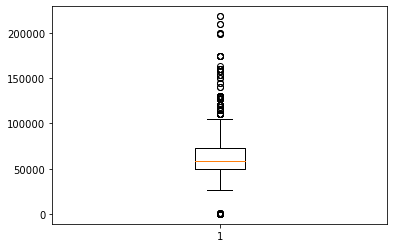

In [24]:
plt.boxplot(df['Target_Salary'])
plt.show()

In [25]:
from scipy.stats import zscore 

In [26]:
df['zscore_tagert_salary'] = zscore(df['Target_Salary'])

<ipython-input-26-4803a2cefc5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zscore_tagert_salary'] = zscore(df['Target_Salary'])


In [27]:
df_required_2 = df.drop(df[(df['zscore_tagert_salary']>3) | (df['zscore_tagert_salary']<-3)].index)

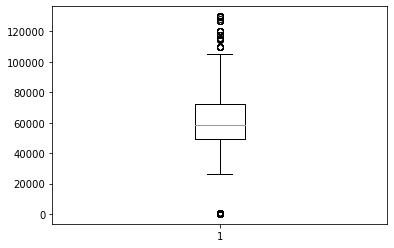

In [28]:
plt.boxplot(df_required_2['Target_Salary'])
plt.show()

# Splitting data for train and test in 80:20 ratio

In [29]:
X = df_required_2[[ 'Civil Service Title','Business Title','Division/Work Unit']]

In [30]:
X.head()

,Civil Service Title,Business Title,Division/Work Unit
0,0,0,0
1,1,0,0
2,2,1,1
3,2,1,1
4,0,2,2


In [31]:
y = df_required_2['Target_Salary']

In [32]:
y.head()

0    42405.00
1    60740.00
2    51907.68
3    51907.68
4       35.00
Name: Target_Salary, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=2331)


# Mutual Information Analysis

In [34]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train,y_train)

In [35]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns

In [36]:
mutual_info

Civil Service Title    0.456902
Business Title         0.352855
Division/Work Unit     0.305470
dtype: float64

# Performing Scaling on feature dataframe

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Selecting the Random Forest Regressor for model

In [38]:
model = RandomForestRegressor(n_estimators=200)
model.fit(X_train,y_train)
pred = model.predict(X_test)

# Model Evaluation

In [39]:
print("R2 score (coefficient of determination) is:", r2_score(y_test,pred))
print("Mean Absolute Error is:", mean_absolute_error(y_test,pred))
print("Mean Squared Error is:", mean_squared_error(y_test,pred))
print("Root Mean Squared Error (RMSE) is:", np.sqrt(mean_squared_error(y_test,pred)))


R2 score (coefficient of determination) is: 0.8283804609321183
Mean Absolute Error is: 5862.938689634789
Mean Squared Error is: 97272389.7598743
Root Mean Squared Error (RMSE) is: 9862.676602214751


In [40]:
compare_df = pd.DataFrame()

In [41]:
compare_df['Predicted Values'] = pred

In [42]:
compare_df['Actual Values'] = y_test.values

In [43]:
compare_df

,Predicted Values,Actual Values
0,85162.316732,91537.0000
1,37224.288507,40275.0000
2,67094.005000,69176.0000
3,53467.515000,56990.0000
4,53719.271766,53134.0000
...,...,...
578,79173.550000,110000.0000
579,45936.757344,28.7488
580,89192.207701,105000.0000
581,55670.460000,57000.0000


<AxesSubplot:>

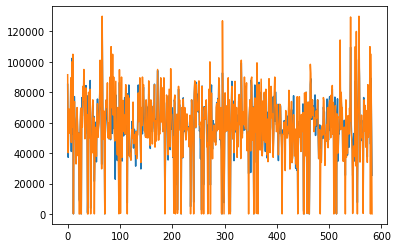

In [44]:
compare_df['Predicted Values'].plot()
compare_df['Actual Values'].plot()

<AxesSubplot:>

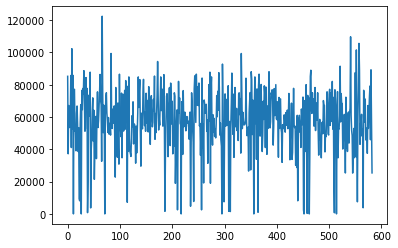

In [45]:
compare_df['Predicted Values'].plot()

<AxesSubplot:>

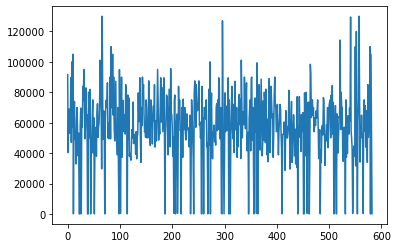

In [46]:
compare_df['Actual Values'].plot()